#### 비정형데이터 - 텍스트마이닝

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

plt.rcParams['figure.figsize']=(6,4)  # figure 사이즈 변경

warnings.filterwarnings('ignore')
sns.set_palette('Paired')

#한글 폰트 적용하기/ 보통  맑은 고딕체 사용
from matplotlib import font_manager, rc
font = 'C:/Windows/Fonts/Malgun.ttf'
font_name = font_manager.FontProperties(fname=font).get_name()
rc('font', family=font_name)

In [ ]:
!pip install finance-datareader

In [ ]:
import FinanceDataReader as fdr

In [ ]:
import requests
from bs4 import BeautifulSoup

In [ ]:
fdr.DataReader('005930', start='2023-01-06')

In [ ]:
url = 'https://www.gmarket.co.kr/n/best'
response = requests.get(url)

In [ ]:
soup = BeautifulSoup(response.content, 'html.parser')
images = soup.select('img.image__lazy')
codes = []
for image in images:
    code = image.get('src').split('/')[3]
    codes.append(code)
print(codes)

In [ ]:
# 지마켓 리뷰 크롤링
all_reviews = []
for code in codes[:5]:
    url = 'http://item.gmarket.co.kr/Review/Premium'
    for page in range(1,201):
        break_point = 0
        params = {'goodsCode': code,
                'pageNo': page,
                'sort': 0,
                'totalPage': 0 }
        
        response = requests.post(url, params)

        if response.status_code == 200:
            # 크롤링(총 리뷰의 수)
            review = BeautifulSoup(response.content, 'html.parser')
            rows = review.select('table > tbody tr')
            for row in rows:
                try:
                    content = row.select_one('td p:nth-child(3)').text.strip()
                    all_reviews.append({'code':code, 'content':content})
                except:
                    break_point = 1
                    break

            if break_point == 1:
                break
        else:
            continue

In [ ]:
# 데이터프레임으로 변환
pd.DataFrame(all_reviews)

In [ ]:
# 워드클라우드
!pip install wordcloud 

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

with open('../data/소나기.txt', 'r', encoding='utf-8') as f:
    text = f.read()

In [ ]:
font = 'C:/Windows/Fonts/Malgun.ttf'

In [ ]:
wc = WordCloud(font_path=font).generate(text)   
# 워드크라우드는 따로 한글 설정해주어야 함

In [ ]:
plt.imshow(wc)
plt.axis('off')

In [ ]:
# 마스크
from PIL import Image

In [ ]:
mask= np.array(Image.open('../data/alice_mask.png'))  
# 0인 검은부분에 워드클라우드 뿌림
wc = WordCloud(font_path=font, mask=mask, background_color='#ffffff', colormap='Blues').generate(text)

In [ ]:
plt.imshow(wc)
plt.axis('off')

In [ ]:
# 다른 이미지인 경우(예: 3채널)에는 변환작업해야
arr = np.array(Image.open('data/image-2.png'))
arr2 = arr.mean(axis = 2).shape

In [ ]:
# KoNLPy 자연어 처리
!pip install konlpy

In [ ]:
from konlpy.tag import Okt, Hannanum, Kkma, Komoran
okt = Okt()    # Twitter -앞으로 사용
han=Hannanum()
kkma=Kkma()
komoran=Komoran()

word=okt.morphs(text)   # 동사 포함
word2=han.morphs(text)  # 명사
word3=kkma.nouns(text)    # 
word4=komoran.pos(text)  # 모든 형태소 

In [ ]:
print(word[:10])
print(word2[:10])
print(word3[:10])
print(word4[:10])

In [ ]:
from collections import Counter
# 형태소별 갯수 세기: 내림차순
words=dict(Counter(word2))

In [ ]:
font = 'C:/Windows/Fonts/Malgun.ttf'
wc = WordCloud(font_path=font, background_color='#ffffff').generate_from_frequencies(words)
plt.imshow(wc)

In [ ]:
# 불용어 사전
with open('../data/stopword.txt', 'r', encoding='utf-8') as f:
    stopword = f.read()
stopwords=stopword.split("\n")
print(stopwords)

In [ ]:
fillter_word = []
for word in word2:
    if word not in stopwords:
        fillter_word.append(word)

words = dict(Counter(fillter_word))
print(words)

(-0.5, 399.5, 199.5, -0.5)

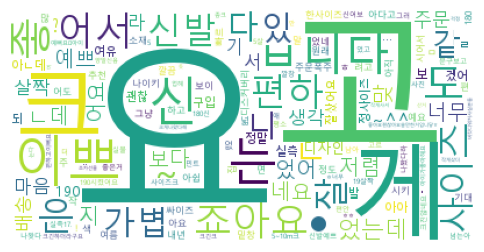

In [56]:
wc = WordCloud(font_path = font, background_color='white').generate_from_frequencies(words)
plt.imshow(wc)
plt.axis('off')

(-0.5, 399.5, 199.5, -0.5)

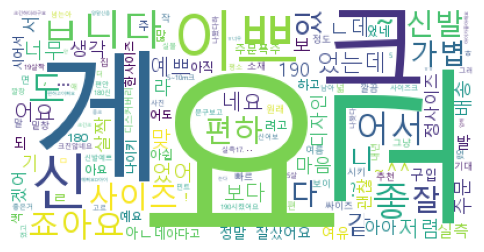

In [57]:
stopwords.extend(['은', '는', '었다', '.', 'ㄴ', 'ㄴ다', '않', '지', '아다'])
fillter_word = []
for word in word2:
    if word not in stopwords:
        fillter_word.append(word)

words = dict(Counter(fillter_word))
font = 'C:/Windows/Fonts/malgun.ttf'
wc = WordCloud(font_path = font, background_color='white').generate_from_frequencies(words)
plt.imshow(wc)
plt.axis('off')

In [58]:
df=pd.DataFrame(all_reviews)
df.head()

,code,content
0,3498395902,한라봉 싱싱하고 맛도 좋아요.
1,2832938734,오 요거 세개 헤드 다 주니까 너무 꿀템인것 같아요 \n저는 사각리필 걸레 많이 쓰...
2,2832938734,♥한줄평\n꼼꼼한 바닥 청소를 원하는 분들께 적극 추천!\n청소 자주 하시는 분들...
3,2832938734,동그란거 네모난거 물기제거하는거 다 포함된 구성이네요 가격대비 최고예요…스카치밀대쓰...
4,3204882468,중간사이즈라 빈사이즈올려주문하네요


In [59]:
# 중복제거
df=df.drop_duplicates('content')
df.head()

,code,content
0,3498395902,한라봉 싱싱하고 맛도 좋아요.
1,2832938734,오 요거 세개 헤드 다 주니까 너무 꿀템인것 같아요 \n저는 사각리필 걸레 많이 쓰...
2,2832938734,♥한줄평\n꼼꼼한 바닥 청소를 원하는 분들께 적극 추천!\n청소 자주 하시는 분들...
3,2832938734,동그란거 네모난거 물기제거하는거 다 포함된 구성이네요 가격대비 최고예요…스카치밀대쓰...
4,3204882468,중간사이즈라 빈사이즈올려주문하네요


In [60]:
# 특정 물품에대한 리뷰데이터만 하나의 문자열로 들고오기

def select_item(item_id):
    df2 = df[df['code'] == item_id]
    return ' '.join(df2['content'].values)

In [61]:
# 형태소분석
def tokenize(text):
    kkma = Kkma()
    word = kkma.morphs(text)
    return word

In [62]:
# 불용어 처리 + counter  작업

def stop_count(word):
    fillter_word = []
    for w in word:
        if w not in stopwords:
            fillter_word.append(w)

    words = dict(Counter(fillter_word))
    return words

In [63]:
# 워드클라우드 그리기
def word_cloud(words):
    font = 'C:/Windows/Fonts/malgun.ttf'
    wc = WordCloud(font_path = font, background_color='white').generate_from_frequencies(words)
    plt.imshow(wc)
    plt.axis('off')
    plt.show()

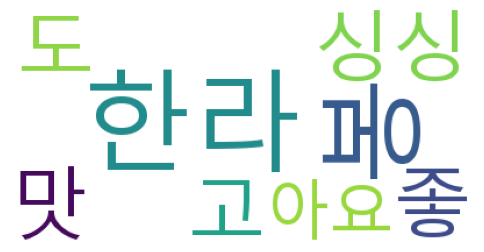

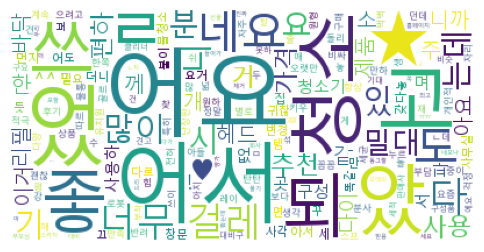

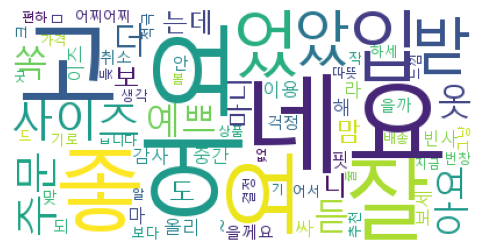

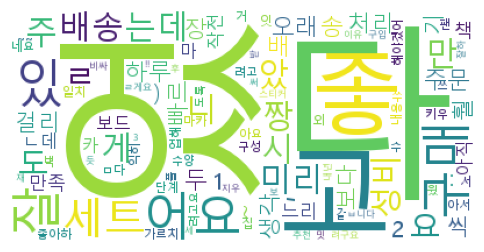

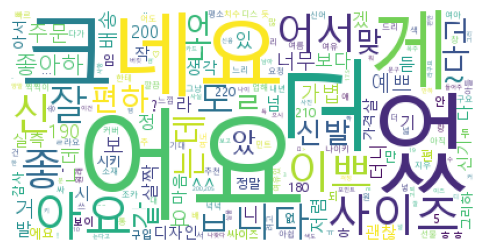

In [65]:
for item_id in df['code'].unique():
    text = select_item(item_id)
    word = tokenize(text)
    words = stop_count(word)
    word_cloud(words)

#### 

In [ ]:
with open('../data/소나기.txt', 'r', encoding='utf-8') as f:
    text = f.read()

In [ ]:
import re

re.sub('[^ 가-힣ㄱ-ㅎ\.]+', '',text)